## Bank Churn Prediction

#### Background and Context

Businesses like banks that provide service have to worry about the problem of 'Churn' i.e. customers leaving and joining another service provider. It is important to understand which aspects of the service influence a customer's decision in this regard. Management can concentrate efforts on the improvement of service, keeping in mind these priorities.

#### Objective

Given a Bank customer, build a neural network-based classifier that can determine whether they will leave or not in the next 6 months.

#### Data Dictionary

- CustomerId: Unique ID which is assigned to each customer
- Surname: Last name of the customer 
- CreditScore: It defines the credit history of the customer.  
- Geography: A customer’s location    
- Gender: It defines the Gender of the customer   
- Age: Age of the customer     
- Tenure: Number of years for which the customer has been with the bank
- NumOfProducts: It refers to the number of products that a customer has purchased through the bank.
- Balance: Account balance
- HasCrCard: It is a categorical variable that decides whether the customer has a credit card or not.
- EstimatedSalary: Estimated salary 
- isActiveMember: It is a categorical variable that decides whether the customer is an active member of the bank or not ( Active member in the sense, using bank products regularly, making transactions, etc )
- Excited: It is a categorical variable that decides whether the customer left the bank within six months or not. It can take two values 
                    0=No ( Customer did not leave the bank )

                    1=Yes ( Customer left the bank )

##### Import necessary libraries

In [292]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
# library to import to standardize the data
from sklearn.preprocessing import MinMaxScaler
from sklearn import model_selection
from sklearn.compose import ColumnTransformer
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
import warnings
from sklearn.metrics import confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dense, Input, Dropout,BatchNormalization
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
import random
from tensorflow.keras import backend
random.seed(1)
np.random.seed(1) 
tf.random.set_seed(1)
warnings.filterwarnings("ignore")

In [293]:
df = pd.read_csv('Churn.csv')

In [294]:
data = df.copy()

In [295]:
# Checking the number of rows and columns in the data
data.shape

(10000, 14)

In [296]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [297]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [298]:
# Let's check for duplicate values in the data
data.duplicated().sum()

0

In [299]:
# Let's check for missing values in the data
round(data.isnull().sum() / data.isnull().count() * 100, 2)

RowNumber          0.0
CustomerId         0.0
Surname            0.0
CreditScore        0.0
Geography          0.0
Gender             0.0
Age                0.0
Tenure             0.0
Balance            0.0
NumOfProducts      0.0
HasCrCard          0.0
IsActiveMember     0.0
EstimatedSalary    0.0
Exited             0.0
dtype: float64

In [300]:
data["Exited"].value_counts(1)

0    0.7963
1    0.2037
Name: Exited, dtype: float64

In [301]:
# Let's view the statistical summary of the numerical columns in the data
data.describe().T

,count,mean,std,min,25%,50%,75%,max
RowNumber,10000.0,5.000500e+03,2886.895680,1.00,2500.75,5.000500e+03,7.500250e+03,10000.00
CustomerId,10000.0,1.569094e+07,71936.186123,15565701.00,15628528.25,1.569074e+07,1.575323e+07,15815690.00
CreditScore,10000.0,6.505288e+02,96.653299,350.00,584.00,6.520000e+02,7.180000e+02,850.00
Age,10000.0,3.892180e+01,10.487806,18.00,32.00,3.700000e+01,4.400000e+01,92.00
Tenure,10000.0,5.012800e+00,2.892174,0.00,3.00,5.000000e+00,7.000000e+00,10.00
Balance,10000.0,7.648589e+04,62397.405202,0.00,0.00,9.719854e+04,1.276442e+05,250898.09
NumOfProducts,10000.0,1.530200e+00,0.581654,1.00,1.00,1.000000e+00,2.000000e+00,4.00
HasCrCard,10000.0,7.055000e-01,0.455840,0.00,0.00,1.000000e+00,1.000000e+00,1.00
IsActiveMember,10000.0,5.151000e-01,0.499797,0.00,0.00,1.000000e+00,1.000000e+00,1.00
EstimatedSalary,10000.0,1.000902e+05,57510.492818,11.58,51002.11,1.001939e+05,1.493882e+05,199992.48


In [302]:
# Let's check the number of unique values in each column
data.nunique()

RowNumber          10000
CustomerId         10000
Surname             2932
CreditScore          460
Geography              3
Gender                 2
Age                   70
Tenure                11
Balance             6382
NumOfProducts          4
HasCrCard              2
IsActiveMember         2
EstimatedSalary     9999
Exited                 2
dtype: int64

In [303]:
for i in data.describe(include=["object"]).columns:
    print("Unique values in", i, "are :")
    print(data[i].value_counts())
    print("*" * 50)

Unique values in Surname are :
Smith       32
Scott       29
Martin      29
Walker      28
Brown       26
            ..
Izmailov     1
Bold         1
Bonham       1
Poninski     1
Burbidge     1
Name: Surname, Length: 2932, dtype: int64
**************************************************
Unique values in Geography are :
France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64
**************************************************
Unique values in Gender are :
Male      5457
Female    4543
Name: Gender, dtype: int64
**************************************************


##### Dropping the unique columns

In [304]:
# ID column consists of uniques ID for clients and hence will not add value to the modeling
data.drop(columns="RowNumber", inplace=True)
data.drop(columns="CustomerId", inplace=True)
data.drop(columns="Surname", inplace=True)

- RowNumber, CustomerId and Surname are unique to each customer and hence will not add vlue to the modeling/analysis

In [305]:
data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


## EDA

### Univariate Analysis

In [306]:
# Function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [307]:
data.dtypes

CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

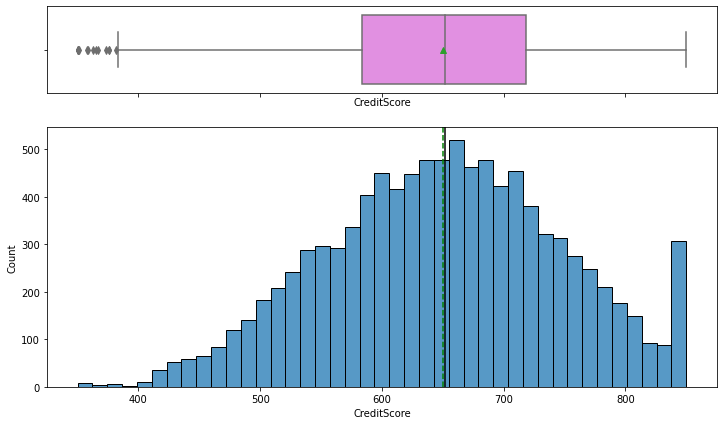

In [308]:
histogram_boxplot(data, 'CreditScore')

- The data is normally distributed with mean around 6.5k.

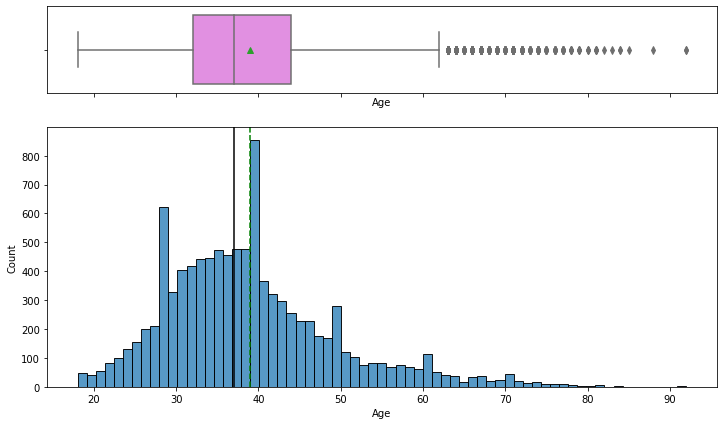

In [309]:
histogram_boxplot(data, 'Age')

- The data is slightly right skewed with mean greater median. The median age is 37 years with some outliers.

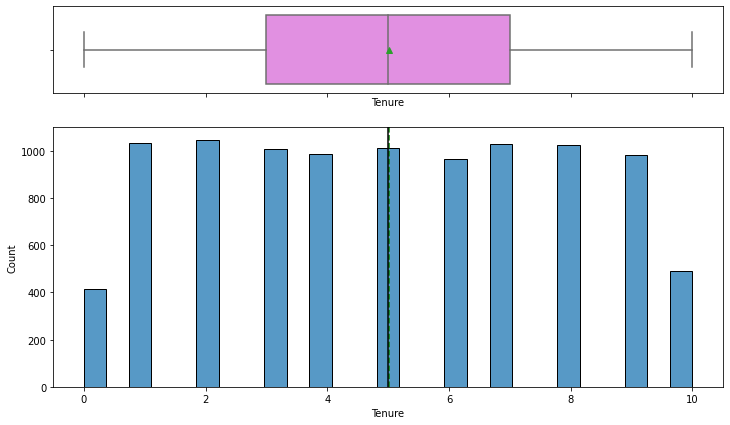

In [310]:
histogram_boxplot(data, 'Tenure')

- The tenure is range between 0 - 10 years. The mean and median is 5 years.

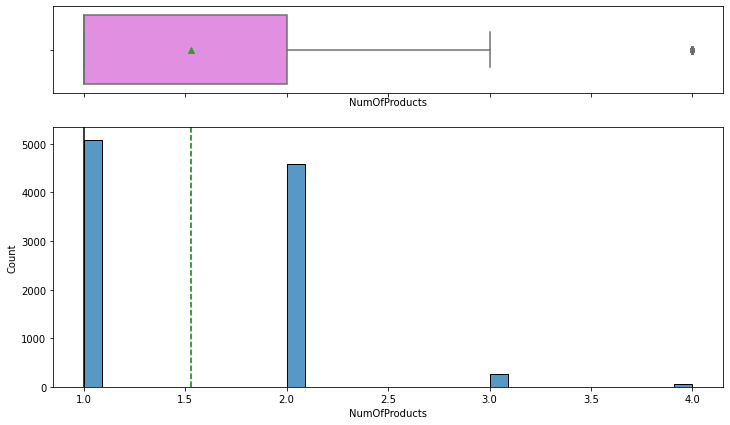

In [311]:
histogram_boxplot(data, 'NumOfProducts')

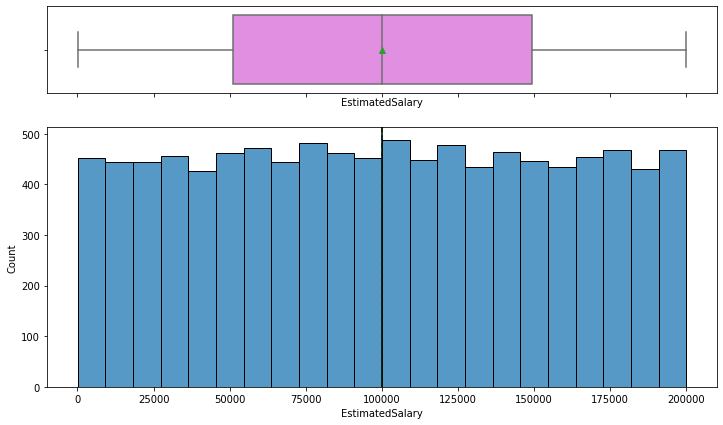

In [312]:
histogram_boxplot(data, 'EstimatedSalary')

- The max estimated salary is 200k and the mean and median are around 100k.

In [313]:
# Function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

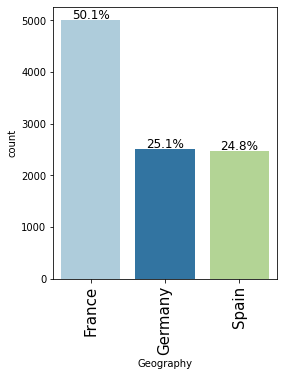

In [314]:
labeled_barplot(data, 'Geography', perc=True)

- 50% of the customers are from France.
- The other 50% of the customers are equally from Germany and Spain.

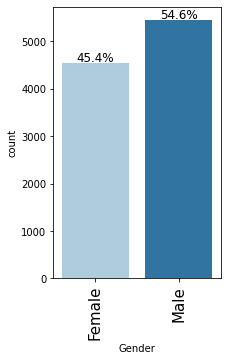

In [315]:
labeled_barplot(data, 'Gender', perc=True)

- 55% of the customers are male and the remaining are Female.

### Bivariate Analysis

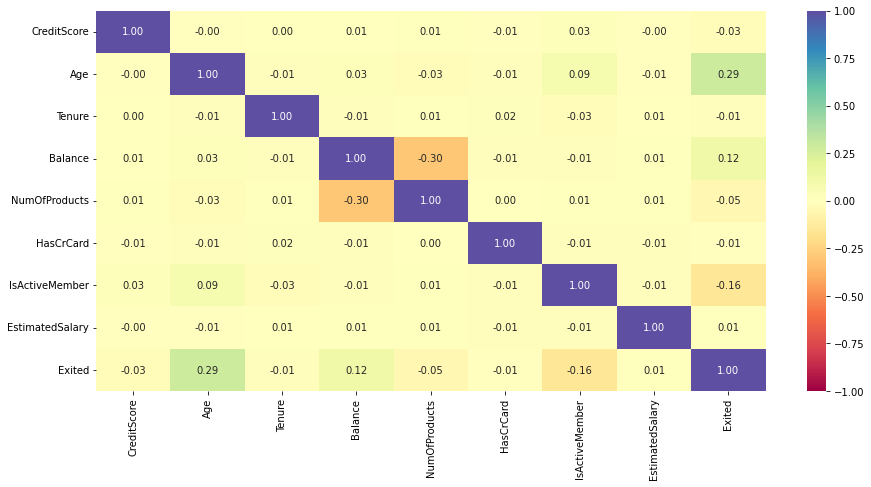

In [316]:
corr_cols = []
for col in data.columns:
    if data[col].dtypes != 'object':
        corr_cols.append(col)
        
plt.figure(figsize=(15, 7))
sns.heatmap(
    data[corr_cols].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral"
)
plt.show()

- The numerical columns of the data seem to be independent of each other overall.
- The age column shows slight +ve correlation if the customer is going to churn or not. Similarly how active a member is also -vely correlated with if he/she is going to churn or not.

In [317]:
### Function to plot distributions


def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of Exited for Exited=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
    )

    axs[0, 1].set_title("Distribution of Exited for Exited=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
    )

    axs[1, 0].set_title("Boxplot w.r.t Exited")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t Exited")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

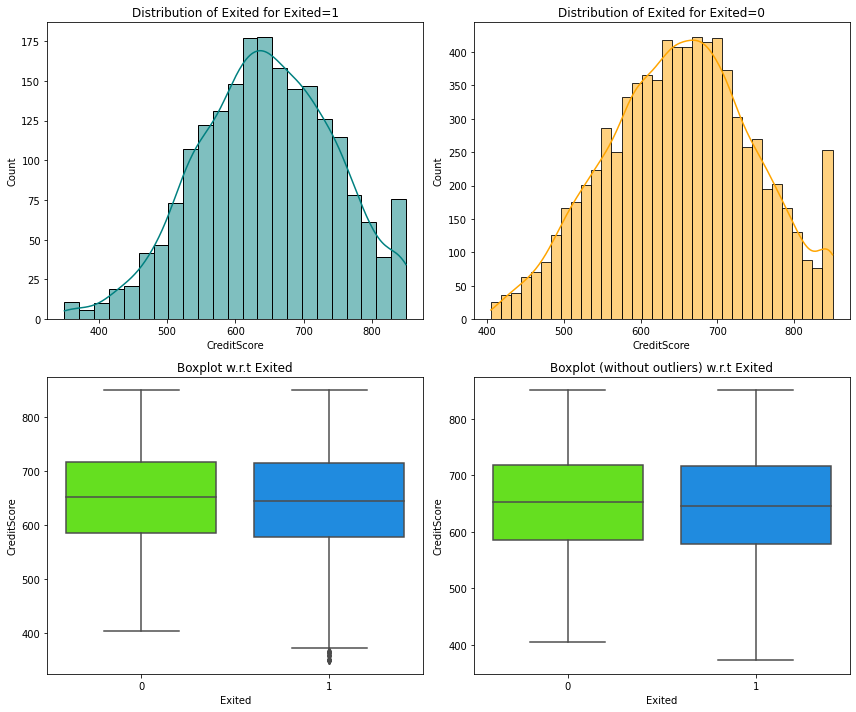

In [318]:
distribution_plot_wrt_target(data, "CreditScore", "Exited")

We observe that the distribution of the credit score with respect to the target variable is slightly left skewed, and from the box plot for both classes the median credit score are around 650.

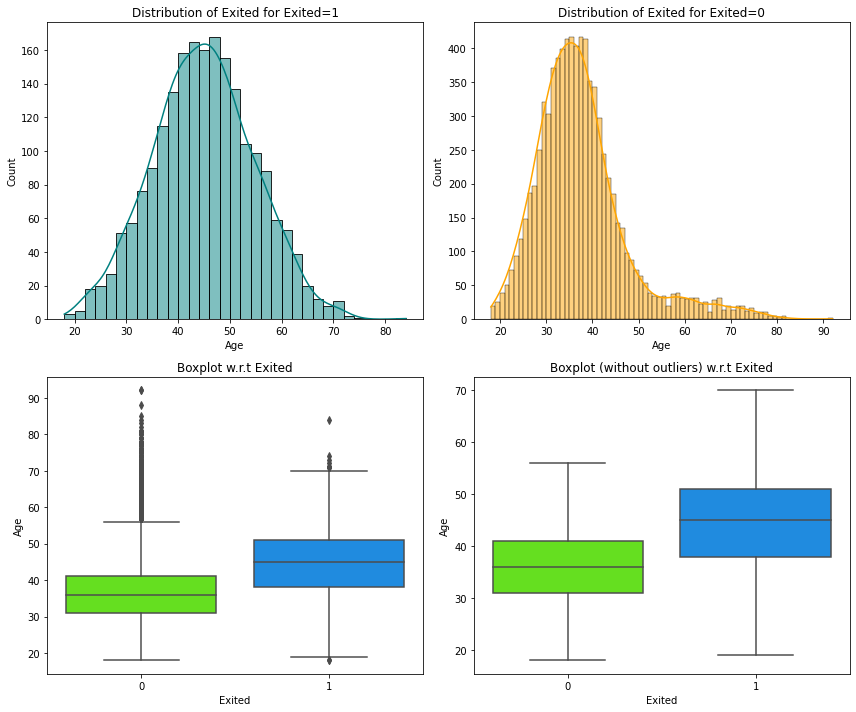

In [319]:
distribution_plot_wrt_target(data, "Age", "Exited")

We observe that the distribution of the Age with respect to the target variable is rightly skewed, and from the box plot for both class 0 the median Age is around 35 and for class 1 the median Age is 45.

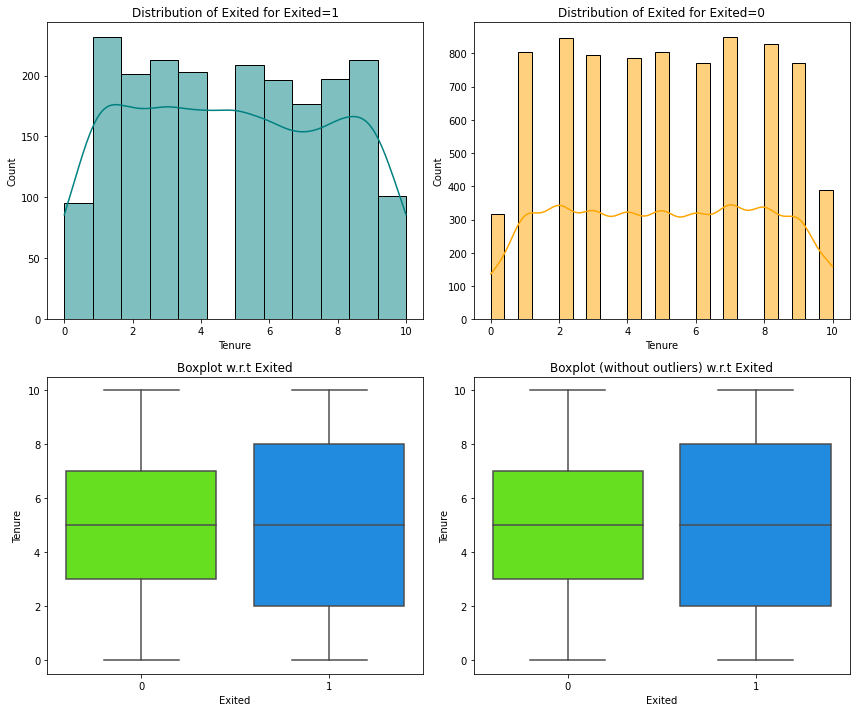

In [320]:
distribution_plot_wrt_target(data, "Tenure", "Exited")

We observe that the distribution of the Tenure with respect to the target variable is evenely distributed, and from the box plot for both classes the median Tenure is 5 years.

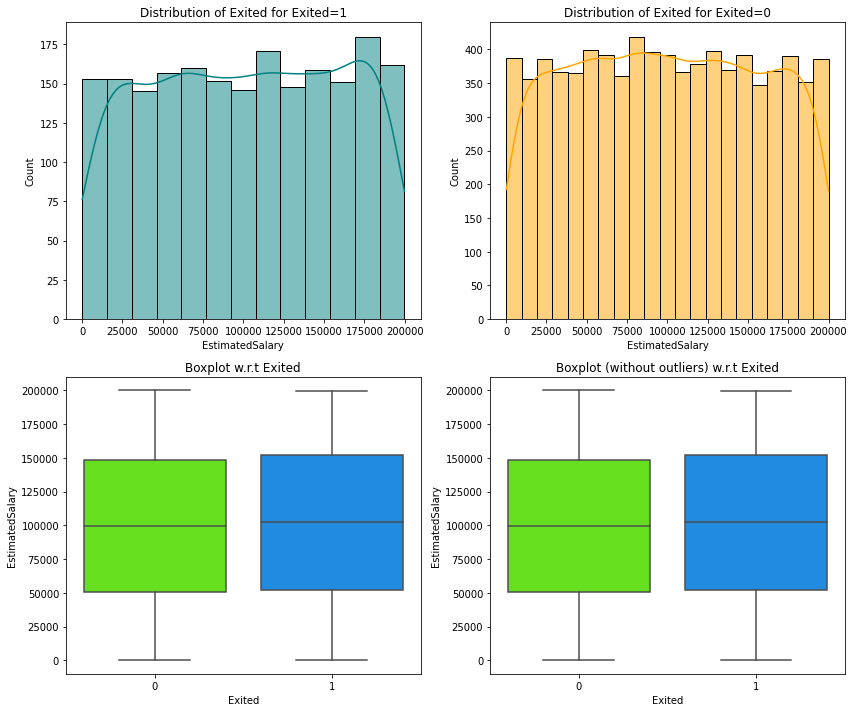

In [321]:
distribution_plot_wrt_target(data, "EstimatedSalary", "Exited")

We observe that the distribution of the Estimated Salary with respect to the target variable is evenly distributed, and from the box plot for both classes the median estimated salary is around 100k.

In [322]:
# function to plot stacked bar chart


def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 1, 5))
    plt.legend(
        loc="lower left",
        frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

Exited        0     1    All
Geography                   
All        7963  2037  10000
Germany    1695   814   2509
France     4204   810   5014
Spain      2064   413   2477
------------------------------------------------------------------------------------------------------------------------


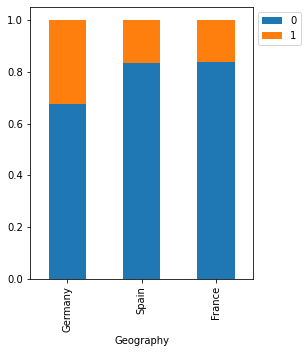

In [323]:
stacked_barplot(data, "Geography", "Exited")

- Almost twice the number of customers from Germany churned compared to Spain and France.

Exited     0     1    All
Gender                   
All     7963  2037  10000
Female  3404  1139   4543
Male    4559   898   5457
------------------------------------------------------------------------------------------------------------------------


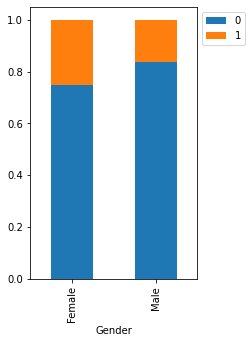

In [324]:
stacked_barplot(data, "Gender", "Exited")

- More female customers churned compared to male customers.

### If the data is imbalanced ?

0    7963
1    2037
Name: Exited, dtype: int64


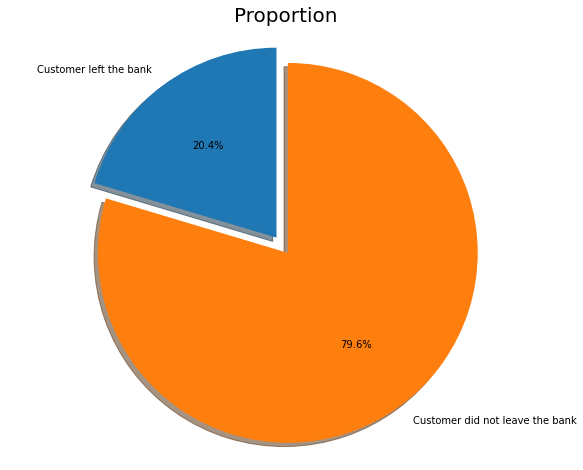

In [325]:
print(data.Exited.value_counts())
labels = 'Customer left the bank', 'Customer did not leave the bank'
#sizes = [ds.is_promoted[ds['is_promoted']==1].count(), ds.is_promoted[ds['is_promoted']==0].count()]
sizes = [data.Exited[data['Exited']==1].count(),data.Exited[data['Exited']==0].count()]
explode = (0, 0.1)
fig1, ax1 = plt.subplots(figsize=(10, 8))
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')
plt.title("Proportion", size = 20)
plt.show()

### Data Pre-processing

In [326]:
## Separating Independent and Dependent Columns
X = data.drop(['Exited'],axis=1)
Y = data[['Exited']]

In [327]:
Y.head()

,Exited
0,1
1,0
2,1
3,0
4,0


In [328]:
# Splitting the dataset into the Training and Testing set.

X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size = 0.2, random_state = 42,stratify = Y)

In [329]:
X_train.isnull().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
dtype: int64

In [330]:
# Checking that no column has missing values in train and test sets
print(X_train.isna().sum())
print("-" * 30)
print(X_test.isna().sum())

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
dtype: int64
------------------------------
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
dtype: int64


#### Encoding Categorical Columns

In [331]:
labelencoder_G = LabelEncoder()
X_train['Geography']=  labelencoder_G.fit_transform(X_train['Geography'])
X_test['Geography']=  labelencoder_G.transform(X_test['Geography'])

In [332]:
labelencoder_A = LabelEncoder()
X_train['Gender']=  labelencoder_A.fit_transform(X_train['Gender'])
X_test['Gender']=  labelencoder_A.transform(X_test['Gender'])

In [333]:
X_train.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
2151,753,0,1,57,7,0.00,1,1,0,159475.08
8392,739,1,1,32,3,102128.27,1,1,0,63981.37
5006,755,1,0,37,0,113865.23,2,1,1,117396.25
4117,561,0,1,37,5,0.00,2,1,0,83093.25
7182,692,1,1,49,6,110540.43,2,0,1,107472.99


In [334]:
data["Geography"].value_counts(1)

France     0.5014
Germany    0.2509
Spain      0.2477
Name: Geography, dtype: float64

In [335]:
y_train.head()

,Exited
2151,1
8392,1
5006,0
4117,0
7182,0


In [336]:
###Checking the shape of train and test sets
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(8000, 10)
(2000, 10)
(8000, 1)
(2000, 1)


#### Scaling

In [337]:
scaler = MinMaxScaler()

# Here, we are passing all the features (numerical and categorical), that's okay as min-max scaler will not change values of categorical variables
X_train_normalized = scaler.fit_transform(X_train)

In [338]:
X_test_normalized = scaler.transform(X_test)

In [339]:
np.set_printoptions(suppress=True)
print(X_train_normalized)

[[0.806      0.         1.         ... 1.         0.         0.79739365]
 [0.778      0.5        1.         ... 1.         0.         0.3198795 ]
 [0.81       0.5        0.         ... 1.         1.         0.58697941]
 ...
 [0.634      0.         0.         ... 1.         1.         0.33864839]
 [0.674      1.         1.         ... 1.         0.         0.11118907]
 [0.904      1.         1.         ... 0.         1.         0.20424055]]


In [340]:
X_train_normalized_df = pd.DataFrame(X_train_normalized, index=X_train.index, columns=X_train.columns)
X_test_normalized_df = pd.DataFrame(X_test_normalized, index=X_test.index, columns=X_test.columns)

In [341]:
X_train_normalized_df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
2151,0.806,0.0,1.0,0.527027,0.7,0.000000,0.000000,1.0,0.0,0.797394
8392,0.778,0.5,1.0,0.189189,0.3,0.428413,0.000000,1.0,0.0,0.319879
5006,0.810,0.5,0.0,0.256757,0.0,0.477648,0.333333,1.0,1.0,0.586979
4117,0.422,0.0,1.0,0.256757,0.5,0.000000,0.333333,1.0,0.0,0.415448
7182,0.684,0.5,1.0,0.418919,0.6,0.463700,0.333333,0.0,1.0,0.537358


In [342]:
X_test_normalized_df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
5702,0.470,0.0,1.0,0.243243,0.7,0.000000,0.333333,1.0,0.0,0.471403
3667,0.350,0.5,1.0,0.202703,0.4,0.549625,0.333333,0.0,0.0,0.275333
1617,0.414,1.0,0.0,0.297297,0.4,0.000000,0.333333,0.0,1.0,0.527160
5673,0.578,1.0,1.0,0.216216,0.5,0.584733,0.333333,0.0,0.0,0.169709
4272,0.580,1.0,0.0,0.216216,0.3,0.326472,0.000000,1.0,1.0,0.842747


In [343]:
X_train.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
2151,753,0,1,57,7,0.00,1,1,0,159475.08
8392,739,1,1,32,3,102128.27,1,1,0,63981.37
5006,755,1,0,37,0,113865.23,2,1,1,117396.25
4117,561,0,1,37,5,0.00,2,1,0,83093.25
7182,692,1,1,49,6,110540.43,2,0,1,107472.99


## Model Building

### Model evaluation criterion:

#### A model can make wrong predictions in the following ways:

1. Predicting a customer is going to churn but in reality, the customer is not going to churn - Loss of resources
2. Predicting a customer is not going to churn but in reality the customer is going to churn - Loss of opportunity

#### Which case is more important?

- Predicting a customer is not going to churn but in reality the customer is going to churn i.e. losing on a potential opportunity as the customer will not be targeted by the Bank when he should be targeted.

#### How to reduce this loss i.e need to reduce False Negatives?

- Bank would want Recall to be maximized, greater the Recall lesser the chances of false negatives.

### Model 1

In [344]:
backend.clear_session()
#Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)

In [345]:
# Initializing the ANN
model1 = Sequential()
# The amount of nodes (dimensions) in hidden layer should be the average of input and output layers, in this case 64.
# This adds the input layer (by specifying input dimension) AND the first hidden layer (units)
model1.add(Dense(activation = 'relu', input_dim = X_train.shape[1], units=64))
#Add 1st hidden layer
model1.add(Dense(32, activation='relu'))
# Adding the output layer
# Notice that we do not need to specify input dim. 
# we have an output of 1 node, which is the the desired dimensions of our output (stay with the bank or not)
# We use the sigmoid because we want probability outcomes
model1.add(Dense(1, activation = 'sigmoid')) 

In [346]:
# Create optimizer with default learning rate
# Compile the model
model1.compile(optimizer='SGD', loss='binary_crossentropy', metrics=['accuracy'])

In [347]:
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                704       
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 2,817
Trainable params: 2,817
Non-trainable params: 0
_________________________________________________________________


In [348]:
history=model1.fit(X_train_normalized_df, y_train,           
          validation_split=0.2,
          epochs=50,
          batch_size=32,verbose=1)

Epoch 1/50
200/200 [==============================] - 1s 4ms/step - loss: 0.5217 - accuracy: 0.7919 - val_loss: 0.4900 - val_accuracy: 0.8000
Epoch 2/50
200/200 [==============================] - 1s 3ms/step - loss: 0.4930 - accuracy: 0.7953 - val_loss: 0.4844 - val_accuracy: 0.8000
Epoch 3/50
200/200 [==============================] - 1s 3ms/step - loss: 0.4868 - accuracy: 0.7953 - val_loss: 0.4795 - val_accuracy: 0.8000
Epoch 4/50
200/200 [==============================] - 1s 3ms/step - loss: 0.4815 - accuracy: 0.7953 - val_loss: 0.4752 - val_accuracy: 0.8000
Epoch 5/50
200/200 [==============================] - 1s 3ms/step - loss: 0.4768 - accuracy: 0.7953 - val_loss: 0.4717 - val_accuracy: 0.8000
Epoch 6/50
200/200 [==============================] - 1s 3ms/step - loss: 0.4726 - accuracy: 0.7953 - val_loss: 0.4686 - val_accuracy: 0.8000
Epoch 7/50
200/200 [==============================] - 1s 3ms/step - loss: 0.4691 - accuracy: 0.7953 - val_loss: 0.4661 - val_accuracy: 0.8000
Epoch 

63/63 [==============================] - 0s 2ms/step - loss: 16302.6123 - accuracy: 0.2045


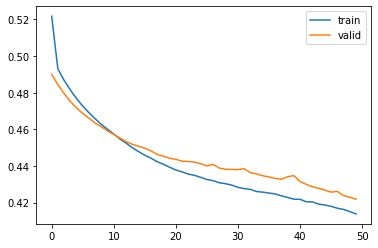

In [349]:
# Capturing learning history per epoch
hist  = pd.DataFrame(history.history)
hist['epoch'] = history.epoch

# Plotting accuracy at different epochs
plt.plot(hist['loss'])
plt.plot(hist['val_loss'])
plt.legend(("train" , "valid") , loc =0)

#Printing results
results = model1.evaluate(X_test, y_test)

In [350]:
y_pred=model1.predict(X_test_normalized_df)
y_pred = (y_pred > 0.5)
y_pred

63/63 [==============================] - 0s 2ms/step


array([[False],
       [False],
       [False],
       ...,
       [ True],
       [False],
       [False]])

In [351]:
def make_confusion_matrix(cf,
                          group_names=None,
                          categories='auto',
                          count=True,
                          percent=True,
                          cbar=True,
                          xyticks=True,
                          xyplotlabels=True,
                          sum_stats=True,
                          figsize=None,
                          cmap='Blues',
                          title=None):
    '''
    This function will make a pretty plot of an sklearn Confusion Matrix cm using a Seaborn heatmap visualization.
    Arguments
    '''


    # CODE TO GENERATE TEXT INSIDE EACH SQUARE
    blanks = ['' for i in range(cf.size)]

    if group_names and len(group_names)==cf.size:
        group_labels = ["{}\n".format(value) for value in group_names]
    else:
        group_labels = blanks

    if count:
        group_counts = ["{0:0.0f}\n".format(value) for value in cf.flatten()]
    else:
        group_counts = blanks

    if percent:
        group_percentages = ["{0:.2%}".format(value) for value in cf.flatten()/np.sum(cf)]
    else:
        group_percentages = blanks

    box_labels = [f"{v1}{v2}{v3}".strip() for v1, v2, v3 in zip(group_labels,group_counts,group_percentages)]
    box_labels = np.asarray(box_labels).reshape(cf.shape[0],cf.shape[1])


    # CODE TO GENERATE SUMMARY STATISTICS & TEXT FOR SUMMARY STATS
    if sum_stats:
        #Accuracy is sum of diagonal divided by total observations
        accuracy  = np.trace(cf) / float(np.sum(cf))



    # SET FIGURE PARAMETERS ACCORDING TO OTHER ARGUMENTS
    if figsize==None:
        #Get default figure size if not set
        figsize = plt.rcParams.get('figure.figsize')

    if xyticks==False:
        #Do not show categories if xyticks is False
        categories=False


    # MAKE THE HEATMAP VISUALIZATION
    plt.figure(figsize=figsize)
    sns.heatmap(cf,annot=box_labels,fmt="",cmap=cmap,cbar=cbar,xticklabels=categories,yticklabels=categories)

    
    if title:
        plt.title(title)

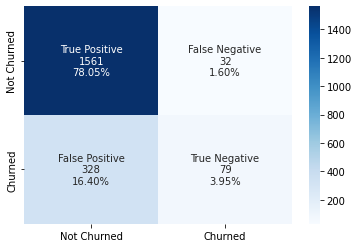

In [352]:
#Calculating the confusion matrix 
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test, y_pred)
labels = ['True Positive','False Negative','False Positive','True Negative']
categories = [ 'Not Churned','Churned']
make_confusion_matrix(cm, 
                      group_names=labels,
                      categories=categories, 
                      cmap='Blues')

Here, the 21.8% of False Negatives is because we gave 0.5 as the threshold to the model, and as this is an imbalanced dataset, we should calculate the threshold using the AUC-ROC curve.

In [353]:
#Accuracy as per the classification report 
from sklearn import metrics
cr=metrics.classification_report(y_test,y_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.83      0.98      0.90      1593
           1       0.71      0.19      0.31       407

    accuracy                           0.82      2000
   macro avg       0.77      0.59      0.60      2000
weighted avg       0.80      0.82      0.78      2000



As we can see, the above model has a relatively poor recall score. This could be due to the imbalanced dataset. We observe that the False negative rates are also high, which should be considerably lower.

1) Imbalanced dataset: As you have seen in the EDA, this dataset is imbalanced, and it contains more examples that belong to the 0 class.

2) Decision Threshold: Due to the imbalanced dataset, we can use ROC-AUC to find the optimal threshold and use the same for prediction.

Let's try to change the optimizer, tune the decision threshold, increase the layers and configure some other hyperparameters accordingly, in order to improve the model's performance.

63/63 [==============================] - 0s 2ms/step
Best Threshold=0.212659, G-Mean=0.724


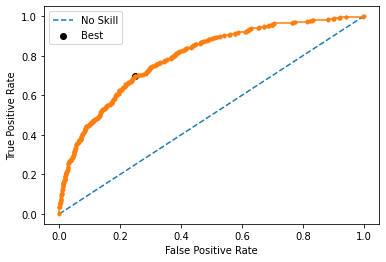

In [354]:
from sklearn.metrics import roc_curve

from matplotlib import pyplot


# predict probabilities
yhat1 = model1.predict(X_test_normalized_df)
# keep probabilities for the positive outcome only
yhat1 = yhat1[:, 0]
# calculate roc curves
fpr, tpr, thresholds1 = roc_curve(y_test, yhat1)
# calculate the g-mean for each threshold
gmeans1 = np.sqrt(tpr * (1-fpr))
# locate the index of the largest g-mean
ix = np.argmax(gmeans1)
print('Best Threshold=%f, G-Mean=%.3f' % (thresholds1[ix], gmeans1[ix]))
# plot the roc curve for the model
pyplot.plot([0,1], [0,1], linestyle='--', label='No Skill')
pyplot.plot(fpr, tpr, marker='.')
pyplot.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
# show the plot
pyplot.show()

In [355]:
#Predicting the results using best as a threshold
y_pred_e1=model1.predict(X_test_normalized_df)
y_pred_e1 = (y_pred_e1 > thresholds1[ix])
y_pred_e1

63/63 [==============================] - 0s 2ms/step


array([[False],
       [False],
       [False],
       ...,
       [ True],
       [False],
       [False]])

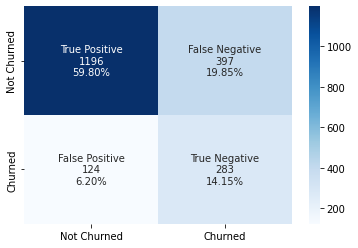

In [356]:
#Calculating the confusion matrix 
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test, y_pred_e1)
labels = ['True Positive','False Negative','False Positive','True Negative']
categories = [ 'Not Churned','Churned']
make_confusion_matrix(cm, 
                      group_names=labels,
                      categories=categories, 
                      cmap='Blues')

In [357]:
#Accuracy as per the classification report 
from sklearn import metrics
cr=metrics.classification_report(y_test,y_pred_e1)
print(cr)

              precision    recall  f1-score   support

           0       0.91      0.75      0.82      1593
           1       0.42      0.70      0.52       407

    accuracy                           0.74      2000
   macro avg       0.66      0.72      0.67      2000
weighted avg       0.81      0.74      0.76      2000



- Using the ROC-AUC threshold, we can see the False negatives have increased however, there is some improvement in macro recall score.

### Model 2

In [358]:
backend.clear_session()
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)

In [359]:
model1 = Sequential()
      #Adding the hidden and output layers
model1.add(Dense(256,activation='relu',kernel_initializer='he_uniform',input_dim = X_train.shape[1]))
model1.add(Dense(128,activation='relu',kernel_initializer='he_uniform'))
model1.add(Dense(64,activation='relu',kernel_initializer='he_uniform'))
model1.add(Dense(32,activation='relu',kernel_initializer='he_uniform'))
model1.add(Dense(1, activation = 'sigmoid'))
      #Compiling the ANN with Adam optimizer and binary cross entropy loss function 
optimizer = tf.keras.optimizers.Adam(0.001)
model1.compile(loss='binary_crossentropy',optimizer=optimizer,metrics=['accuracy'])

In [360]:
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               2816      
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                                                 
 dense_3 (Dense)             (None, 32)                2080      
                                                                 
 dense_4 (Dense)             (None, 1)                 33        
                                                                 
Total params: 46,081
Trainable params: 46,081
Non-trainable params: 0
_________________________________________________________________


In [361]:
history1 = model1.fit(X_train_normalized_df,y_train,batch_size=64,epochs=50,verbose=1,validation_split = 0.2)

Epoch 1/50
100/100 [==============================] - 1s 6ms/step - loss: 0.4714 - accuracy: 0.7952 - val_loss: 0.4583 - val_accuracy: 0.8050
Epoch 2/50
100/100 [==============================] - 0s 4ms/step - loss: 0.4273 - accuracy: 0.8239 - val_loss: 0.4072 - val_accuracy: 0.8313
Epoch 3/50
100/100 [==============================] - 0s 4ms/step - loss: 0.3960 - accuracy: 0.8284 - val_loss: 0.3772 - val_accuracy: 0.8494
Epoch 4/50
100/100 [==============================] - 0s 4ms/step - loss: 0.3702 - accuracy: 0.8484 - val_loss: 0.3653 - val_accuracy: 0.8531
Epoch 5/50
100/100 [==============================] - 0s 5ms/step - loss: 0.3614 - accuracy: 0.8522 - val_loss: 0.3540 - val_accuracy: 0.8631
Epoch 6/50
100/100 [==============================] - 0s 4ms/step - loss: 0.3593 - accuracy: 0.8506 - val_loss: 0.3486 - val_accuracy: 0.8606
Epoch 7/50
100/100 [==============================] - 0s 4ms/step - loss: 0.3509 - accuracy: 0.8503 - val_loss: 0.3556 - val_accuracy: 0.8556
Epoch 

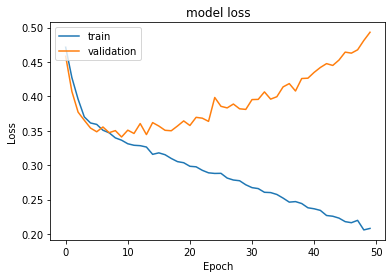

In [362]:
#Plotting Train Loss vs Validation Loss
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])
plt.title('model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

- As we increased the number of layers, we see from the diverging train and validation curves that the model is over-fitted.

63/63 [==============================] - 0s 2ms/step
Best Threshold=0.222609, G-Mean=0.704


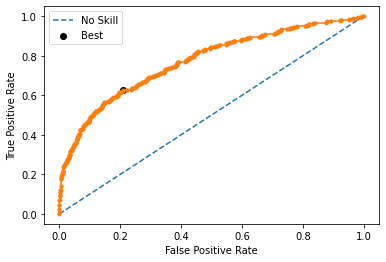

In [363]:
from sklearn.metrics import roc_curve

from matplotlib import pyplot


# predict probabilities
yhat1 = model1.predict(X_test_normalized_df)
# keep probabilities for the positive outcome only
yhat1 = yhat1[:, 0]
# calculate roc curves
fpr, tpr, thresholds1 = roc_curve(y_test, yhat1)
# calculate the g-mean for each threshold
gmeans1 = np.sqrt(tpr * (1-fpr))
# locate the index of the largest g-mean
ix = np.argmax(gmeans1)
print('Best Threshold=%f, G-Mean=%.3f' % (thresholds1[ix], gmeans1[ix]))
# plot the roc curve for the model
pyplot.plot([0,1], [0,1], linestyle='--', label='No Skill')
pyplot.plot(fpr, tpr, marker='.')
pyplot.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
# show the plot
pyplot.show()

In [364]:
#Predicting the results using best as a threshold
y_pred_e1=model1.predict(X_test_normalized_df)
y_pred_e1 = (y_pred_e1 > thresholds1[ix])
y_pred_e1

63/63 [==============================] - 0s 2ms/step


array([[False],
       [False],
       [ True],
       ...,
       [ True],
       [False],
       [False]])

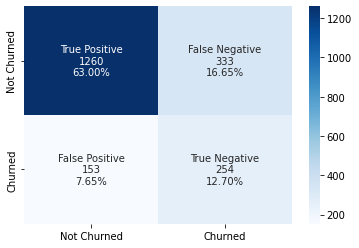

In [365]:
#Calculating the confusion matrix 
from sklearn.metrics import confusion_matrix
cm1=confusion_matrix(y_test, y_pred_e1)
labels = ['True Positive','False Negative','False Positive','True Negative']
categories = [ 'Not Churned','Churned']
make_confusion_matrix(cm1, 
                      group_names=labels,
                      categories=categories, 
                      cmap='Blues')

In [366]:
#Accuracy as per the classification report 
from sklearn import metrics
cr=metrics.classification_report(y_test,y_pred_e1)
print(cr)

              precision    recall  f1-score   support

           0       0.89      0.79      0.84      1593
           1       0.43      0.62      0.51       407

    accuracy                           0.76      2000
   macro avg       0.66      0.71      0.67      2000
weighted avg       0.80      0.76      0.77      2000



As the number of layers in the neural network has increased, we can see that the macro recall score has decreased slightly but the False Negative percentage has improved (i.e. percentage reduced.)

Now let's try to use the Batch Normalization technique and check to see if we can increase the recall score.

### Model 3

In [367]:
backend.clear_session()
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)

In [368]:
model3 = Sequential()
model3.add(Dense(128,activation='relu',input_dim = X_train.shape[1]))
model3.add(BatchNormalization())
model3.add(Dense(64,activation='relu',kernel_initializer='he_uniform'))
model3.add(BatchNormalization())
model3.add(Dense(32,activation='relu',kernel_initializer='he_uniform'))
model3.add(Dense(1, activation = 'sigmoid'))

In [369]:
model3.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               1408      
                                                                 
 batch_normalization (BatchN  (None, 128)              512       
 ormalization)                                                   
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 batch_normalization_1 (Batc  (None, 64)               256       
 hNormalization)                                                 
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dense_3 (Dense)             (None, 1)                 3

In [370]:
optimizer = tf.keras.optimizers.Adam(0.001)
model3.compile(loss='binary_crossentropy',optimizer=optimizer,metrics=['accuracy'])

In [371]:
history_3 = model2.fit(X_train_normalized_df,y_train,batch_size=64,epochs=50,verbose=1,validation_split = 0.2)

Epoch 1/50
100/100 [==============================] - 1s 6ms/step - loss: 0.0851 - accuracy: 0.9641 - val_loss: 0.9964 - val_accuracy: 0.8231
Epoch 2/50
100/100 [==============================] - 0s 5ms/step - loss: 0.0815 - accuracy: 0.9681 - val_loss: 0.9769 - val_accuracy: 0.8138
Epoch 3/50
100/100 [==============================] - 0s 5ms/step - loss: 0.0817 - accuracy: 0.9711 - val_loss: 0.9683 - val_accuracy: 0.8181
Epoch 4/50
100/100 [==============================] - 1s 5ms/step - loss: 0.0756 - accuracy: 0.9709 - val_loss: 1.0286 - val_accuracy: 0.8056
Epoch 5/50
100/100 [==============================] - 0s 5ms/step - loss: 0.0812 - accuracy: 0.9670 - val_loss: 0.9941 - val_accuracy: 0.8100
Epoch 6/50
100/100 [==============================] - 0s 5ms/step - loss: 0.0829 - accuracy: 0.9683 - val_loss: 1.0215 - val_accuracy: 0.8156
Epoch 7/50
100/100 [==============================] - 0s 5ms/step - loss: 0.0631 - accuracy: 0.9770 - val_loss: 1.0331 - val_accuracy: 0.8231
Epoch 

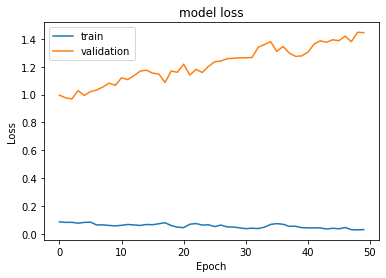

In [372]:
#Plotting Train Loss vs Validation Loss
plt.plot(history_3.history['loss'])
plt.plot(history_3.history['val_loss'])
plt.title('model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

- Unfortunately, from the above plot we seem to have overfitted on the training data because there is a significant difference in performance between train and validation.

63/63 [==============================] - 0s 2ms/step
Best Threshold=0.497093, G-Mean=0.584


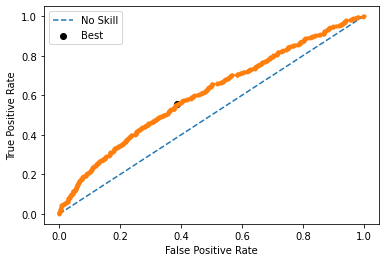

In [373]:
from sklearn.metrics import roc_curve

from matplotlib import pyplot


# predict probabilities
yhat3 = model3.predict(X_test_normalized_df)
# keep probabilities for the positive outcome only
yhat3 = yhat3[:, 0]
# calculate roc curves
fpr, tpr, thresholds3 = roc_curve(y_test, yhat3)
# calculate the g-mean for each threshold
gmeans3 = np.sqrt(tpr * (1-fpr))
# locate the index of the largest g-mean
ix = np.argmax(gmeans3)
print('Best Threshold=%f, G-Mean=%.3f' % (thresholds3[ix], gmeans3[ix]))
# plot the roc curve for the model
pyplot.plot([0,1], [0,1], linestyle='--', label='No Skill')
pyplot.plot(fpr, tpr, marker='.')
pyplot.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
# show the plot
pyplot.show()

In [374]:
y_pred_e3=model3.predict(X_test_normalized_df)
y_pred_e3 = (y_pred_e3 > thresholds3[ix])
y_pred_e3

63/63 [==============================] - 0s 2ms/step


array([[False],
       [ True],
       [False],
       ...,
       [ True],
       [False],
       [ True]])

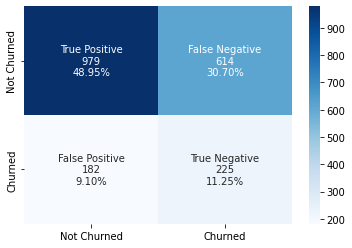

In [375]:
#Calculating the confusion matrix 
from sklearn.metrics import confusion_matrix
cm3=confusion_matrix(y_test, y_pred_e3)
labels = ['True Positive','False Negative','False Positive','True Negative']
categories = [ 'Not Churned','Churned']
make_confusion_matrix(cm3, 
                      group_names=labels,
                      categories=categories, 
                      cmap='Blues')

In [376]:
#Accuracy as per the classification report 
from sklearn import metrics
cr3=metrics.classification_report(y_test,y_pred_e3)
print(cr3)

              precision    recall  f1-score   support

           0       0.84      0.61      0.71      1593
           1       0.27      0.55      0.36       407

    accuracy                           0.60      2000
   macro avg       0.56      0.58      0.54      2000
weighted avg       0.73      0.60      0.64      2000



The model shows a poor recall scrore and a high False Negative rate.

Let's try to use the Dropout technique and check to see if it can reduce the False Negative rate.

### Model 4

In [377]:
backend.clear_session()
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)

In [378]:
model4 = Sequential()
model4.add(Dense(256,activation='relu',input_dim = X_train.shape[1]))
model4.add(Dropout(0.3))
model4.add(Dense(128,activation='relu'))
model4.add(Dropout(0.3))
model4.add(Dense(64,activation='relu'))
model4.add(Dropout(0.3))
model4.add(Dense(32,activation='relu'))
model4.add(Dense(1, activation = 'sigmoid'))

In [379]:
model4.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               2816      
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                                                 
 dropout_2 (Dropout)         (None, 64)                0         
                                                                 
 dense_3 (Dense)             (None, 32)                2

In [380]:
optimizer = tf.keras.optimizers.Adam(0.001)
model4.compile(loss='binary_crossentropy',optimizer=optimizer,metrics=['accuracy'])

In [381]:
history_4 = model4.fit(X_train_normalized_df,y_train,batch_size=64,epochs=50,verbose=1,validation_split = 0.2)

Epoch 1/50
100/100 [==============================] - 2s 7ms/step - loss: 0.5051 - accuracy: 0.7883 - val_loss: 0.4650 - val_accuracy: 0.8000
Epoch 2/50
100/100 [==============================] - 1s 5ms/step - loss: 0.4615 - accuracy: 0.7952 - val_loss: 0.4537 - val_accuracy: 0.8006
Epoch 3/50
100/100 [==============================] - 0s 5ms/step - loss: 0.4448 - accuracy: 0.8039 - val_loss: 0.4284 - val_accuracy: 0.8269
Epoch 4/50
100/100 [==============================] - 1s 5ms/step - loss: 0.4310 - accuracy: 0.8186 - val_loss: 0.4100 - val_accuracy: 0.8444
Epoch 5/50
100/100 [==============================] - 1s 5ms/step - loss: 0.4172 - accuracy: 0.8270 - val_loss: 0.3927 - val_accuracy: 0.8550
Epoch 6/50
100/100 [==============================] - 0s 5ms/step - loss: 0.4033 - accuracy: 0.8331 - val_loss: 0.3717 - val_accuracy: 0.8550
Epoch 7/50
100/100 [==============================] - 0s 5ms/step - loss: 0.3915 - accuracy: 0.8364 - val_loss: 0.3624 - val_accuracy: 0.8650
Epoch 

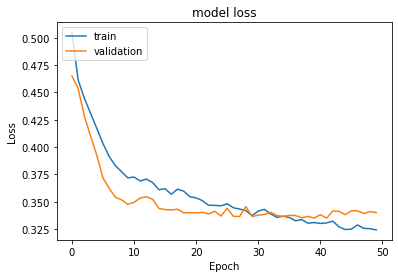

In [382]:
#Plotting Train Loss vs Validation Loss
plt.plot(history_4.history['loss'])
plt.plot(history_4.history['val_loss'])
plt.title('model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

From the above plot, we observe that both the curves train and validation are smoother and not over-fitted like in the previous model.

63/63 [==============================] - 0s 2ms/step
Best Threshold=0.221197, G-Mean=0.762


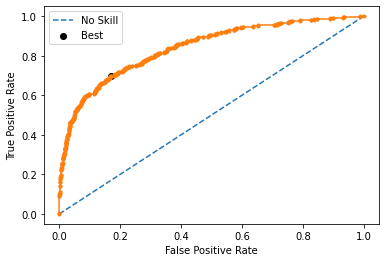

In [383]:
from sklearn.metrics import roc_curve

from matplotlib import pyplot


# predict probabilities
yhat4 = model4.predict(X_test_normalized_df)
# keep probabilities for the positive outcome only
yhat4 = yhat4[:, 0]
# calculate roc curves
fpr, tpr, thresholds4 = roc_curve(y_test, yhat4)
# calculate the g-mean for each threshold
gmeans4 = np.sqrt(tpr * (1-fpr))
# locate the index of the largest g-mean
ix = np.argmax(gmeans4)
print('Best Threshold=%f, G-Mean=%.3f' % (thresholds4[ix], gmeans4[ix]))
# plot the roc curve for the model
pyplot.plot([0,1], [0,1], linestyle='--', label='No Skill')
pyplot.plot(fpr, tpr, marker='.')
pyplot.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
# show the plot
pyplot.show()

In [384]:
y_pred_e4=model4.predict(X_test_normalized_df)
y_pred_e4 = (y_pred_e4 > thresholds4[ix])
y_pred_e4

63/63 [==============================] - 0s 3ms/step


array([[False],
       [False],
       [False],
       ...,
       [ True],
       [False],
       [False]])

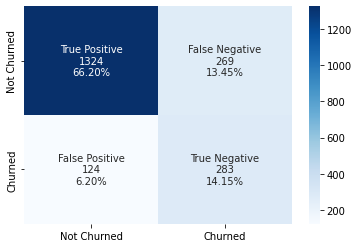

In [385]:
#Calculating the confusion matrix 
from sklearn.metrics import confusion_matrix
cm4=confusion_matrix(y_test, y_pred_e4)
labels = ['True Positive','False Negative','False Positive','True Negative']
categories = [ 'Not Churned','Churned']
make_confusion_matrix(cm4, 
                      group_names=labels,
                      categories=categories, 
                      cmap='Blues')

In [386]:
#Accuracy as per the classification report 
from sklearn import metrics
cr4=metrics.classification_report(y_test,y_pred_e4)
print(cr4)

              precision    recall  f1-score   support

           0       0.91      0.83      0.87      1593
           1       0.51      0.70      0.59       407

    accuracy                           0.80      2000
   macro avg       0.71      0.76      0.73      2000
weighted avg       0.83      0.80      0.81      2000



The Dropout technique helped the model reduce the loss function of both train and validation. The recall score also seems to be fine, with a decrease in the False Negative rate.

Now, let's try to use some of the Hyperparameter Optimization techniques we have learnt, such as RandomizedSearchCV, GridSearchCV and Keras Tuner to increase the recall score of the model.

### Model 5

#### Random Search CV

Some important hyperparameters to look out for while optimizing neural networks are:

- Type of Architecture

- Number of Layers

- Number of Neurons in a layer

- Regularization hyperparameters

- Learning Rate

- Type of Optimizer

- Dropout Rate

In [387]:
backend.clear_session()
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)

In [388]:
def create_model_v4(lr,batch_size):  
    np.random.seed(1337)
    model = Sequential()
    model.add(Dense(256,activation='relu',input_dim = X_train.shape[1]))
    model.add(Dropout(0.3))
    #model.add(Dense(128,activation='relu',kernel_initializer='he_uniform'))
    model.add(Dense(128,activation='relu'))
    model.add(Dropout(0.3))
    model.add(Dense(64,activation='relu'))
    model.add(Dropout(0.2))
    #model.add(Dense(32,activation='relu',kernel_initializer='he_uniform'))
    #model.add(Dropout(0.3))
    model.add(Dense(32,activation='relu')) 
    model.add(Dense(1, activation='sigmoid'))

    #compile model
    optimizer = tf.keras.optimizers.Adam(learning_rate=lr)
    model.compile(optimizer = optimizer,loss = 'binary_crossentropy', metrics = ['accuracy'])
    return model

In [389]:
keras_estimator = KerasClassifier(build_fn=create_model_v4, verbose=1)
# define the grid search parameters
param_random = {
    'batch_size':[32, 64, 128],
    "lr":[0.01,0.1,0.001],}

kfold_splits = 3
random= RandomizedSearchCV(estimator=keras_estimator,  
                    verbose=1,
                    cv=kfold_splits,  
                    param_distributions=param_random,n_jobs=-1)

In [390]:
random_result = random.fit(X_train_normalized_df, y_train,validation_split=0.2,verbose=1) 

# Summarize results
print("Best: %f using %s" % (random_result.best_score_, random_result.best_params_))
means = random_result.cv_results_['mean_test_score']
stds = random_result.cv_results_['std_test_score']
params = random_result.cv_results_['params']

Fitting 3 folds for each of 9 candidates, totalling 27 fits
200/200 [==============================] - 2s 7ms/step - loss: 0.4782 - accuracy: 0.7970 - val_loss: 0.4571 - val_accuracy: 0.8000
Best: 0.796250 using {'lr': 0.01, 'batch_size': 32}


In [391]:
estimator_v4=create_model_v4(batch_size=random_result.best_params_['batch_size'],lr=random_result.best_params_['lr'])

estimator_v4.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 256)               2816      
                                                                 
 dropout_3 (Dropout)         (None, 256)               0         
                                                                 
 dense_6 (Dense)             (None, 128)               32896     
                                                                 
 dropout_4 (Dropout)         (None, 128)               0         
                                                                 
 dense_7 (Dense)             (None, 64)                8256      
                                                                 
 dropout_5 (Dropout)         (None, 64)                0         
                                                                 
 dense_8 (Dense)             (None, 32)               

In [392]:
optimizer = tf.keras.optimizers.Adam(random_result.best_params_['lr'])
estimator_v4.compile(loss='binary_crossentropy',optimizer=optimizer,metrics=['accuracy'])
history_4=estimator_v4.fit(X_train_normalized_df, y_train, epochs=50, batch_size = 64, verbose=1,validation_split=0.2)

Epoch 1/50
100/100 [==============================] - 2s 9ms/step - loss: 0.4757 - accuracy: 0.7948 - val_loss: 0.4889 - val_accuracy: 0.8000
Epoch 2/50
100/100 [==============================] - 1s 7ms/step - loss: 0.4429 - accuracy: 0.8059 - val_loss: 0.4049 - val_accuracy: 0.8456
Epoch 3/50
100/100 [==============================] - 1s 6ms/step - loss: 0.4085 - accuracy: 0.8311 - val_loss: 0.3931 - val_accuracy: 0.8537
Epoch 4/50
100/100 [==============================] - 1s 7ms/step - loss: 0.3971 - accuracy: 0.8384 - val_loss: 0.3594 - val_accuracy: 0.8669
Epoch 5/50
100/100 [==============================] - 1s 6ms/step - loss: 0.3961 - accuracy: 0.8394 - val_loss: 0.3572 - val_accuracy: 0.8644
Epoch 6/50
100/100 [==============================] - 1s 5ms/step - loss: 0.3898 - accuracy: 0.8373 - val_loss: 0.3480 - val_accuracy: 0.8675
Epoch 7/50
100/100 [==============================] - 1s 6ms/step - loss: 0.3851 - accuracy: 0.8395 - val_loss: 0.3629 - val_accuracy: 0.8637
Epoch 

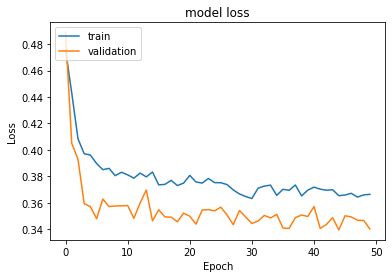

In [393]:
#Plotting Train Loss vs Validation Loss
plt.plot(history_4.history['loss'])
plt.plot(history_4.history['val_loss'])
plt.title('model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

From the above plot, we observe that there is noise in the both training and validation behavior of the model.

63/63 [==============================] - 0s 2ms/step
Best Threshold=0.216967, G-Mean=0.763


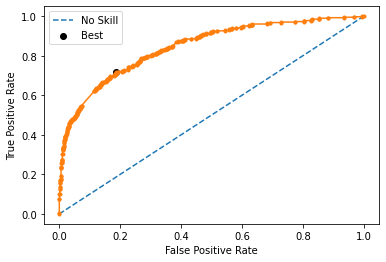

In [394]:
from sklearn.metrics import roc_curve

from matplotlib import pyplot


# predict probabilities
yhat4 = estimator_v4.predict(X_test_normalized_df)
# keep probabilities for the positive outcome only
yhat4 = yhat4[:, 0]
# calculate roc curves
fpr, tpr, thresholds4 = roc_curve(y_test, yhat4)
# calculate the g-mean for each threshold
gmeans4 = np.sqrt(tpr * (1-fpr))
# locate the index of the largest g-mean
ix = np.argmax(gmeans4)
print('Best Threshold=%f, G-Mean=%.3f' % (thresholds4[ix], gmeans4[ix]))
# plot the roc curve for the model
pyplot.plot([0,1], [0,1], linestyle='--', label='No Skill')
pyplot.plot(fpr, tpr, marker='.')
pyplot.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
# show the plot
pyplot.show()

In [395]:
y_pred_e4=estimator_v4.predict(X_test_normalized_df)
y_pred_e4 = (y_pred_e4 > thresholds4[ix])
y_pred_e4

63/63 [==============================] - 0s 2ms/step


array([[False],
       [False],
       [False],
       ...,
       [ True],
       [False],
       [False]])

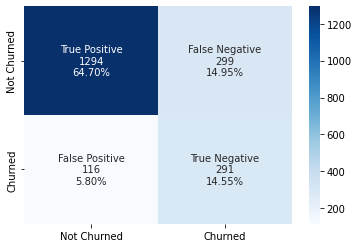

In [396]:
#Calculating the confusion matrix 
from sklearn.metrics import confusion_matrix
cm4=confusion_matrix(y_test, y_pred_e4)
labels = ['True Positive','False Negative','False Positive','True Negative']
categories = [ 'Not Churned','Churned']
make_confusion_matrix(cm4, 
                      group_names=labels,
                      categories=categories, 
                      cmap='Blues')

In [397]:
#Accuracy as per the classification report 
from sklearn import metrics
cr4=metrics.classification_report(y_test,y_pred_e4)
print(cr4)

              precision    recall  f1-score   support

           0       0.92      0.81      0.86      1593
           1       0.49      0.71      0.58       407

    accuracy                           0.79      2000
   macro avg       0.71      0.76      0.72      2000
weighted avg       0.83      0.79      0.81      2000



Hyperparameter tuning with Grid Search has been used here to get a better recall score, but the recall score might differ each time.

Other hyperparameters can also be tuned to get better metrics.

Here, the recall score of the model, while better than in Randomized Search, is slightly lower than in Model 1 (the simple model).

### Model 6

#### Grid Search CV

Some important hyperparameters to look out for while optimizing neural networks are:

- Type of Architecture

- Number of Layers

- Number of Neurons in a layer

- Regularization hyperparameters

- Learning Rate

- Type of Optimizer

- Dropout Rate

In [398]:
backend.clear_session()
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)

In [399]:
def create_model_v5(lr,batch_size):  
    np.random.seed(1337)
    model = Sequential()
    model.add(Dense(256,activation='relu',input_dim = X_train.shape[1]))
    model.add(Dropout(0.3))
    #model.add(Dense(128,activation='relu',kernel_initializer='he_uniform'))
    model.add(Dense(128,activation='relu'))
    model.add(Dropout(0.3))
    model.add(Dense(64,activation='relu'))
    model.add(Dropout(0.2))
    #model.add(Dense(32,activation='relu',kernel_initializer='he_uniform'))
    #model.add(Dropout(0.3))
    model.add(Dense(32,activation='relu')) 
    model.add(Dense(1, activation='sigmoid'))

    #compile model
    optimizer = tf.keras.optimizers.Adam(learning_rate=lr)
    model.compile(optimizer = optimizer,loss = 'binary_crossentropy', metrics = ['accuracy'])
    return model

We're using Grid Search to optimize two hyperparameters - Batch Size & Learning Rate.

We can also optimize the other hyperparameters as mentioned above.

In [400]:
keras_estimator = KerasClassifier(build_fn=create_model_v5, verbose=1)
# define the grid search parameters
param_grid = {
    'batch_size':[64,32, 128],
    "lr":[0.01,0.1,0.001],}

kfold_splits = 3
grid = GridSearchCV(estimator=keras_estimator,  
                    verbose=1,
                    cv=kfold_splits,  
                    param_grid=param_grid,n_jobs=-1)

In [401]:
import time
  
# store starting time
begin = time.time()


grid_result = grid.fit(X_train_normalized_df, y_train,validation_split=0.2,verbose=1) 

# Summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']

time.sleep(1)
# store end time
end = time.time()
  
# total time taken
print(f"Total runtime of the program is {end - begin}")

Fitting 3 folds for each of 9 candidates, totalling 27 fits
200/200 [==============================] - 2s 5ms/step - loss: 0.4782 - accuracy: 0.7970 - val_loss: 0.4571 - val_accuracy: 0.8000
Best: 0.796375 using {'batch_size': 32, 'lr': 0.01}
Total runtime of the program is 26.866636991500854


The best model has the following configuration:

( It may vary each time the code runs )

In [402]:
estimator_v5=create_model_v5(batch_size=grid_result.best_params_['batch_size'],lr=grid_result.best_params_['lr'])

estimator_v5.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 256)               2816      
                                                                 
 dropout_3 (Dropout)         (None, 256)               0         
                                                                 
 dense_6 (Dense)             (None, 128)               32896     
                                                                 
 dropout_4 (Dropout)         (None, 128)               0         
                                                                 
 dense_7 (Dense)             (None, 64)                8256      
                                                                 
 dropout_5 (Dropout)         (None, 64)                0         
                                                                 
 dense_8 (Dense)             (None, 32)               

In [403]:
optimizer = tf.keras.optimizers.Adam(grid_result.best_params_['lr'])
estimator_v5.compile(loss='binary_crossentropy',optimizer=optimizer,metrics=['accuracy'])
history_5=estimator_v5.fit(X_train_normalized_df, y_train, epochs=50, batch_size = 64, verbose=1,validation_split=0.2)

Epoch 1/50
100/100 [==============================] - 3s 7ms/step - loss: 0.4757 - accuracy: 0.7948 - val_loss: 0.4889 - val_accuracy: 0.8000
Epoch 2/50
100/100 [==============================] - 0s 5ms/step - loss: 0.4429 - accuracy: 0.8059 - val_loss: 0.4049 - val_accuracy: 0.8456
Epoch 3/50
100/100 [==============================] - 1s 5ms/step - loss: 0.4085 - accuracy: 0.8311 - val_loss: 0.3931 - val_accuracy: 0.8537
Epoch 4/50
100/100 [==============================] - 1s 5ms/step - loss: 0.3971 - accuracy: 0.8384 - val_loss: 0.3594 - val_accuracy: 0.8669
Epoch 5/50
100/100 [==============================] - 1s 5ms/step - loss: 0.3961 - accuracy: 0.8394 - val_loss: 0.3572 - val_accuracy: 0.8644
Epoch 6/50
100/100 [==============================] - 0s 5ms/step - loss: 0.3898 - accuracy: 0.8373 - val_loss: 0.3480 - val_accuracy: 0.8675
Epoch 7/50
100/100 [==============================] - 1s 5ms/step - loss: 0.3851 - accuracy: 0.8395 - val_loss: 0.3629 - val_accuracy: 0.8637
Epoch 

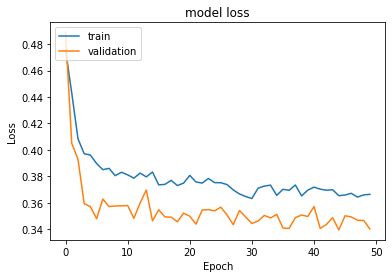

In [404]:
#Plotting Train Loss vs Validation Loss
plt.plot(history_5.history['loss'])
plt.plot(history_5.history['val_loss'])
plt.title('model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

From the above plot, we observe that both curves - train and validation, are relatively smooth.

63/63 [==============================] - 0s 3ms/step
Best Threshold=0.216967, G-Mean=0.763


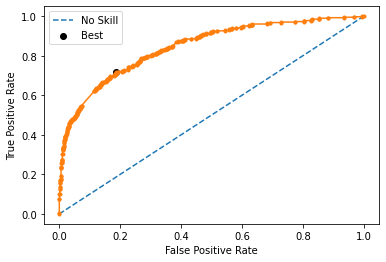

In [405]:
from sklearn.metrics import roc_curve

from matplotlib import pyplot


# predict probabilities
yhat5 = estimator_v5.predict(X_test_normalized_df)
# keep probabilities for the positive outcome only
yhat5 = yhat5[:, 0]
# calculate roc curves
fpr, tpr, thresholds5 = roc_curve(y_test, yhat5)
# calculate the g-mean for each threshold
gmeans5 = np.sqrt(tpr * (1-fpr))
# locate the index of the largest g-mean
ix = np.argmax(gmeans5)
print('Best Threshold=%f, G-Mean=%.3f' % (thresholds5[ix], gmeans5[ix]))
# plot the roc curve for the model
pyplot.plot([0,1], [0,1], linestyle='--', label='No Skill')
pyplot.plot(fpr, tpr, marker='.')
pyplot.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
# show the plot
pyplot.show()

In [406]:
y_pred_e5=estimator_v5.predict(X_test_normalized_df)
y_pred_e5 = (y_pred_e5 > thresholds5[ix])
y_pred_e5

63/63 [==============================] - 0s 3ms/step


array([[False],
       [False],
       [False],
       ...,
       [ True],
       [False],
       [False]])

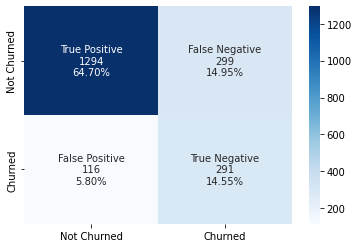

In [407]:
#Calculating the confusion matrix 
from sklearn.metrics import confusion_matrix
cm5=confusion_matrix(y_test, y_pred_e5)
labels = ['True Positive','False Negative','False Positive','True Negative']
categories = [ 'Not Churned','Churned']
make_confusion_matrix(cm5, 
                      group_names=labels,
                      categories=categories, 
                      cmap='Blues')

In [408]:
#Accuracy as per the classification report 
from sklearn import metrics
cr6=metrics.classification_report(y_test,y_pred_e5)
print(cr6)

              precision    recall  f1-score   support

           0       0.92      0.81      0.86      1593
           1       0.49      0.71      0.58       407

    accuracy                           0.79      2000
   macro avg       0.71      0.76      0.72      2000
weighted avg       0.83      0.79      0.81      2000



Hyperparameter tuning with Grid Search has been used here to get a better recall score, but the recall score might differ each time.

Other hyperparameters can also be tuned to get better metrics.

Here, the recall score of the model is better than the Randomized search but it is still less better than our Model 4 which used Dropout technique.

### DASK

- There is also another library called Dask, sometimes used in the industry to provide a performance boost to Hyperparameter Tuning due to its parallelized computing procedure.
- Dask also has the option of implementing Grid Search similar to the Grid Search in Scikit-learn.

In [409]:
# importing library
from dask_ml.model_selection import GridSearchCV as DaskGridSearchCV

In [410]:
def create_model_v6(lr,batch_size):  
    np.random.seed(1337)
    model = Sequential()
    model.add(Dense(256,activation='relu',input_dim = X_train.shape[1]))
    model.add(Dropout(0.3))
    #model.add(Dense(128,activation='relu',kernel_initializer='he_uniform'))
    model.add(Dense(128,activation='relu'))
    model.add(Dropout(0.3))
    model.add(Dense(64,activation='relu'))
    model.add(Dropout(0.2))
    #model.add(Dense(32,activation='relu',kernel_initializer='he_uniform'))
    #model.add(Dropout(0.3))
    model.add(Dense(32,activation='relu')) 
    model.add(Dense(1, activation='sigmoid'))

    #compile model
    optimizer = tf.keras.optimizers.Adam(learning_rate=lr)
    model.compile(optimizer = optimizer,loss = 'binary_crossentropy', metrics = ['accuracy'])
    return model

In [411]:
keras_estimator = KerasClassifier(build_fn=create_model_v6, verbose=1)
# define the grid search parameters
param_grid = {
    'batch_size':[64,32, 128],
    "lr":[0.001,0.01,0.1],}

kfold_splits = 3
dask = DaskGridSearchCV(estimator=keras_estimator, 
                    cv=kfold_splits,  
                    param_grid=param_grid,n_jobs=-1)

In [412]:
import time
  
# store starting time
begin = time.time()


dask_result = dask.fit(X_train_normalized_df, y_train,validation_split=0.2,verbose=1) 

# Summarize results
print("Best: %f using %s" % (dask_result.best_score_, dask_result.best_params_))
means = dask_result.cv_results_['mean_test_score']
stds = dask_result.cv_results_['std_test_score']
params = dask_result.cv_results_['params']

time.sleep(1)
# store end time
end = time.time()
  
# total time taken
print(f"Total runtime of the program is {end - begin}")

200/200 [==============================] - 2s 5ms/step - loss: 0.4818 - accuracy: 0.7977 - val_loss: 0.4411 - val_accuracy: 0.8175
Best: 0.796375 using {'batch_size': 32, 'lr': 0.01}
Total runtime of the program is 68.73174142837524


- We can clearly see the Dask took longer than the Grid search CV. 
- Since the dataset dimensions and hyperparameter number/range were small for this example, Dask couldn't show a significant improvement.

### Keras Tuner

In [413]:
from tensorflow import keras
from tensorflow.keras import layers
from kerastuner.tuners import RandomSearch

In [414]:
backend.clear_session()
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)

#### Hyperparameters

- How many hidden layers should the model have?
- How many neurons should the model have in each hidden layer?
- Learning Rate

In [415]:
def build_model(h):
    model = keras.Sequential()
    for i in range(h.Int('num_layers', 2, 10)):
        model.add(layers.Dense(units=h.Int('units_' + str(i),
                                            min_value=32,
                                            max_value=256,
                                            step=32),
                               activation='relu'))
    model.add(layers.Dense(1, activation='sigmoid'))
    model.compile(
        optimizer=keras.optimizers.Adam(
            h.Choice('learning_rate', [1e-2, 1e-3, 1e-4])),
        loss='binary_crossentropy',
        metrics=['accuracy'])
    return model

Initialize a tuner (here, RandomSearch)

In [416]:
tuner = RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=5,
    executions_per_trial=3,
     project_name='Job_')

INFO:tensorflow:Reloading Oracle from existing project .\Job_\oracle.json
INFO:tensorflow:Reloading Tuner from .\Job_\tuner0.json


In [417]:
tuner.search_space_summary()

Search space summary
Default search space size: 11
num_layers (Int)
{'default': None, 'conditions': [], 'min_value': 2, 'max_value': 10, 'step': 1, 'sampling': None}
units_0 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 256, 'step': 32, 'sampling': None}
units_1 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 256, 'step': 32, 'sampling': None}
learning_rate (Choice)
{'default': 0.01, 'conditions': [], 'values': [0.01, 0.001, 0.0001], 'ordered': True}
units_2 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 256, 'step': 32, 'sampling': None}
units_3 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 256, 'step': 32, 'sampling': None}
units_4 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 256, 'step': 32, 'sampling': None}
units_5 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 256, 'step': 32, 'sampling': None}
units_6 (Int)
{'default': None, 'co

In [418]:
### Searching the best model on X and y train
tuner.search(X_train_normalized_df, y_train,
             epochs=5,
             validation_split = 0.2)

INFO:tensorflow:Oracle triggered exit


In [419]:
## Printing the best models with their hyperparameters
tuner.results_summary()

Results summary
Results in .\Job_
Showing 10 best trials
Trial summary
Hyperparameters:
num_layers: 5
units_0: 160
units_1: 160
learning_rate: 0.001
units_2: 224
units_3: 128
units_4: 224
units_5: 64
units_6: 160
units_7: 64
units_8: 32
Score: 0.8727083206176758
Trial summary
Hyperparameters:
num_layers: 8
units_0: 160
units_1: 64
learning_rate: 0.001
units_2: 160
units_3: 64
units_4: 192
units_5: 32
units_6: 224
units_7: 96
units_8: 192
Score: 0.8702083428700765
Trial summary
Hyperparameters:
num_layers: 5
units_0: 64
units_1: 96
learning_rate: 0.001
units_2: 96
units_3: 224
units_4: 256
units_5: 160
units_6: 192
units_7: 224
units_8: 224
Score: 0.8687500158945719
Trial summary
Hyperparameters:
num_layers: 9
units_0: 128
units_1: 32
learning_rate: 0.0001
units_2: 160
units_3: 160
units_4: 160
units_5: 192
units_6: 96
units_7: 128
units_8: 96
Score: 0.8356250127156576
Trial summary
Hyperparameters:
num_layers: 9
units_0: 192
units_1: 96
learning_rate: 0.0001
units_2: 32
units_3: 32
uni

Let's create a model with the above mentioned best configuration given by Keras Tuner.

### Model 7

In [420]:
backend.clear_session()
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)

In [421]:
model7 = Sequential()
model7.add(Dense(160,activation='relu',kernel_initializer='he_uniform',input_dim = X_train.shape[1]))
model7.add(Dense(160,activation='relu',kernel_initializer='he_uniform'))
model7.add(Dense(224,activation='relu',kernel_initializer='he_uniform'))
model7.add(Dense(128,activation='relu',kernel_initializer='he_uniform'))
model7.add(Dense(224,activation='relu',kernel_initializer='he_uniform'))
model7.add(Dense(1, activation = 'sigmoid'))

In [422]:
model7.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 160)               1760      
                                                                 
 dense_1 (Dense)             (None, 160)               25760     
                                                                 
 dense_2 (Dense)             (None, 224)               36064     
                                                                 
 dense_3 (Dense)             (None, 128)               28800     
                                                                 
 dense_4 (Dense)             (None, 224)               28896     
                                                                 
 dense_5 (Dense)             (None, 1)                 225       
                                                                 
Total params: 121,505
Trainable params: 121,505
Non-trai

In [423]:
optimizer = tf.keras.optimizers.Adam(0.001)
model7.compile(loss='binary_crossentropy',optimizer=optimizer,metrics=['accuracy'])

In [424]:
history_7 = model7.fit(X_train_normalized_df,y_train,batch_size=64,epochs=50,verbose=1,validation_split = 0.2)

Epoch 1/50
100/100 [==============================] - 1s 7ms/step - loss: 0.4651 - accuracy: 0.8045 - val_loss: 0.4589 - val_accuracy: 0.8094
Epoch 2/50
100/100 [==============================] - 0s 5ms/step - loss: 0.4067 - accuracy: 0.8267 - val_loss: 0.3828 - val_accuracy: 0.8356
Epoch 3/50
100/100 [==============================] - 1s 5ms/step - loss: 0.3799 - accuracy: 0.8359 - val_loss: 0.3656 - val_accuracy: 0.8487
Epoch 4/50
100/100 [==============================] - 1s 6ms/step - loss: 0.3635 - accuracy: 0.8475 - val_loss: 0.3715 - val_accuracy: 0.8581
Epoch 5/50
100/100 [==============================] - 1s 5ms/step - loss: 0.3567 - accuracy: 0.8522 - val_loss: 0.3479 - val_accuracy: 0.8569
Epoch 6/50
100/100 [==============================] - 1s 6ms/step - loss: 0.3568 - accuracy: 0.8514 - val_loss: 0.3493 - val_accuracy: 0.8562
Epoch 7/50
100/100 [==============================] - 1s 6ms/step - loss: 0.3444 - accuracy: 0.8555 - val_loss: 0.3581 - val_accuracy: 0.8550
Epoch 

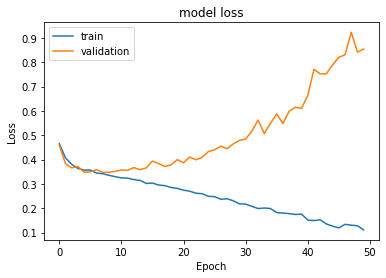

In [425]:
#Plotting Train Loss vs Validation Loss
plt.plot(history_7.history['loss'])
plt.plot(history_7.history['val_loss'])
plt.title('model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

From the above plot, we observe that the train and validation curves show overfitted model.

63/63 [==============================] - 0s 3ms/step
Best Threshold=0.082475, G-Mean=0.710


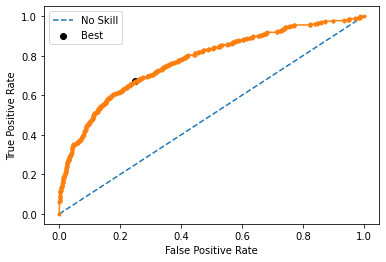

In [426]:
from sklearn.metrics import roc_curve

from matplotlib import pyplot


# predict probabilities
yhat7 = model7.predict(X_test_normalized_df)
# keep probabilities for the positive outcome only
yhat7 = yhat7[:, 0]
# calculate roc curves
fpr, tpr, thresholds7 = roc_curve(y_test, yhat7)
# calculate the g-mean for each threshold
gmeans7 = np.sqrt(tpr * (1-fpr))
# locate the index of the largest g-mean
ix = np.argmax(gmeans7)
print('Best Threshold=%f, G-Mean=%.3f' % (thresholds7[ix], gmeans7[ix]))
# plot the roc curve for the model
pyplot.plot([0,1], [0,1], linestyle='--', label='No Skill')
pyplot.plot(fpr, tpr, marker='.')
pyplot.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
# show the plot
pyplot.show()

In [427]:
y_pred_e7=model7.predict(X_test_normalized_df)
y_pred_e7 = (y_pred_e7 > thresholds7[ix])
y_pred_e7

63/63 [==============================] - 0s 3ms/step


array([[False],
       [False],
       [ True],
       ...,
       [ True],
       [False],
       [ True]])

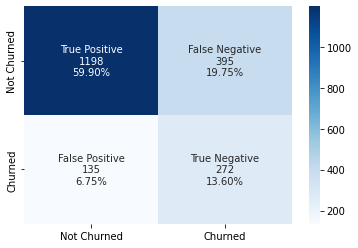

In [428]:
#Calculating the confusion matrix 
from sklearn.metrics import confusion_matrix
cm7=confusion_matrix(y_test, y_pred_e7)
labels = ['True Positive','False Negative','False Positive','True Negative']
categories = [ 'Not Churned','Churned']
make_confusion_matrix(cm7, 
                      group_names=labels,
                      categories=categories, 
                      cmap='Blues')

In [429]:
#Accuracy as per the classification report 
from sklearn import metrics
cr7=metrics.classification_report(y_test,y_pred_e7)
print(cr7)

              precision    recall  f1-score   support

           0       0.90      0.75      0.82      1593
           1       0.41      0.67      0.51       407

    accuracy                           0.73      2000
   macro avg       0.65      0.71      0.66      2000
weighted avg       0.80      0.73      0.76      2000



After using the suggested hyperparameters from Keras Tuner, the recall score and the False Negative rate have improved overall but still less than our best optimized model with Grid search CV so far.

### SMOTE + Keras Tuner

In [430]:
##Applying SMOTE on train and test
from imblearn.over_sampling import SMOTE
smote=SMOTE(sampling_strategy='not majority')
X_sm , y_sm = smote.fit_resample(X_train_normalized_df,y_train)

In [431]:
backend.clear_session()
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)

In [432]:
def build_model_2(h):
    model = keras.Sequential()
    for i in range(h.Int('num_layers', 2, 10)):
        model.add(layers.Dense(units=h.Int('units_' + str(i),
                                            min_value=32,
                                            max_value=256,
                                            step=32),
                               activation='relu'))
    model.add(layers.Dense(1, activation='sigmoid'))
    model.compile(
        optimizer=keras.optimizers.Adam(
            h.Choice('learning_rate', [1e-2, 1e-3, 1e-4])),
        loss='binary_crossentropy',
        metrics=['accuracy'])
    return model

In [433]:
tuner_2 = RandomSearch(
    build_model_2,
    objective='val_accuracy',
    max_trials=5,
    executions_per_trial=3,
    project_name='Job_Switch')

INFO:tensorflow:Reloading Oracle from existing project .\Job_Switch\oracle.json
INFO:tensorflow:Reloading Tuner from .\Job_Switch\tuner0.json


In [434]:
tuner_2.search_space_summary()

Search space summary
Default search space size: 11
num_layers (Int)
{'default': None, 'conditions': [], 'min_value': 2, 'max_value': 10, 'step': 1, 'sampling': None}
units_0 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 256, 'step': 32, 'sampling': None}
units_1 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 256, 'step': 32, 'sampling': None}
learning_rate (Choice)
{'default': 0.01, 'conditions': [], 'values': [0.01, 0.001, 0.0001], 'ordered': True}
units_2 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 256, 'step': 32, 'sampling': None}
units_3 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 256, 'step': 32, 'sampling': None}
units_4 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 256, 'step': 32, 'sampling': None}
units_5 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 256, 'step': 32, 'sampling': None}
units_6 (Int)
{'default': None, 'co

In [435]:
tuner_2.search(X_sm, y_sm,
             epochs=5,
             validation_split = 0.2)

INFO:tensorflow:Oracle triggered exit


In [436]:
tuner_2.results_summary()

Results summary
Results in .\Job_Switch
Showing 10 best trials
Trial summary
Hyperparameters:
num_layers: 8
units_0: 160
units_1: 64
learning_rate: 0.001
units_2: 160
units_3: 64
units_4: 192
units_5: 32
units_6: 224
units_7: 96
units_8: 192
Score: 0.7459445397059122
Trial summary
Hyperparameters:
num_layers: 5
units_0: 160
units_1: 160
learning_rate: 0.001
units_2: 224
units_3: 128
units_4: 224
units_5: 64
units_6: 160
units_7: 64
units_8: 32
Score: 0.7418890595436096
Trial summary
Hyperparameters:
num_layers: 5
units_0: 64
units_1: 96
learning_rate: 0.001
units_2: 96
units_3: 224
units_4: 256
units_5: 160
units_6: 192
units_7: 224
units_8: 224
Score: 0.7021193305651346
Trial summary
Hyperparameters:
num_layers: 9
units_0: 128
units_1: 32
learning_rate: 0.0001
units_2: 160
units_3: 160
units_4: 160
units_5: 192
units_6: 96
units_7: 128
units_8: 96
Score: 0.6225797931353251
Trial summary
Hyperparameters:
num_layers: 9
units_0: 192
units_1: 96
learning_rate: 0.0001
units_2: 32
units_3: 

In [437]:
model9 = Sequential()
model9.add(Dense(160,activation='relu',kernel_initializer='he_uniform',input_dim = X_train.shape[1]))
model9.add(Dense(64,activation='relu',kernel_initializer='he_uniform'))
model9.add(Dense(160,activation='relu',kernel_initializer='he_uniform'))
model9.add(Dense(64,activation='relu',kernel_initializer='he_uniform'))
model9.add(Dense(192,activation='relu',kernel_initializer='he_uniform'))
model9.add(Dense(32,activation='relu',kernel_initializer='he_uniform'))
model9.add(Dense(224,activation='relu',kernel_initializer='he_uniform'))
model9.add(Dense(96,activation='relu',kernel_initializer='he_uniform'))
model9.add(Dense(1, activation = 'sigmoid'))
      #Compiling the ANN with Adam optimizer and binary cross entropy loss function 
optimizer = tf.keras.optimizers.Adam(0.001)
model9.compile(loss='binary_crossentropy',optimizer=optimizer,metrics=['accuracy'])

In [438]:
history_9 = model9.fit(X_sm,y_sm,batch_size=64,epochs=50,verbose=1,validation_split = 0.2)

Epoch 1/50
160/160 [==============================] - 3s 9ms/step - loss: 0.5761 - accuracy: 0.6994 - val_loss: 0.5585 - val_accuracy: 0.6476
Epoch 2/50
160/160 [==============================] - 1s 7ms/step - loss: 0.4909 - accuracy: 0.7552 - val_loss: 1.1609 - val_accuracy: 0.2276
Epoch 3/50
160/160 [==============================] - 1s 6ms/step - loss: 0.4624 - accuracy: 0.7776 - val_loss: 0.6095 - val_accuracy: 0.6868
Epoch 4/50
160/160 [==============================] - 1s 6ms/step - loss: 0.4361 - accuracy: 0.7940 - val_loss: 0.5200 - val_accuracy: 0.7469
Epoch 5/50
160/160 [==============================] - 1s 6ms/step - loss: 0.4225 - accuracy: 0.8016 - val_loss: 0.7120 - val_accuracy: 0.6209
Epoch 6/50
160/160 [==============================] - 1s 6ms/step - loss: 0.4190 - accuracy: 0.8047 - val_loss: 0.5861 - val_accuracy: 0.7104
Epoch 7/50
160/160 [==============================] - 1s 6ms/step - loss: 0.4067 - accuracy: 0.8092 - val_loss: 0.7874 - val_accuracy: 0.6060
Epoch 

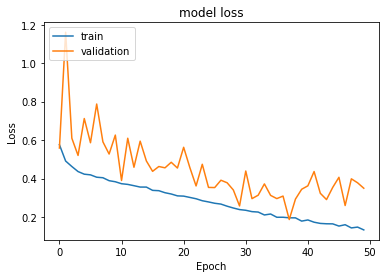

In [439]:
#Plotting Train Loss vs Validation Loss
plt.plot(history_9.history['loss'])
plt.plot(history_9.history['val_loss'])
plt.title('model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

From the above plot, we observe that there is a lot of noise in the model.

63/63 [==============================] - 0s 2ms/step
Best Threshold=0.145695, G-Mean=0.708


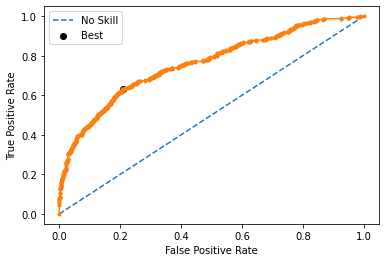

In [440]:
from sklearn.metrics import roc_curve

from matplotlib import pyplot


# predict probabilities
yhat9 = model9.predict(X_test_normalized_df)
# keep probabilities for the positive outcome only
yhat9 = yhat9[:, 0]
# calculate roc curves
fpr, tpr, thresholds9 = roc_curve(y_test, yhat9)
# calculate the g-mean for each threshold
gmeans9 = np.sqrt(tpr * (1-fpr))
# locate the index of the largest g-mean
ix = np.argmax(gmeans9)
print('Best Threshold=%f, G-Mean=%.3f' % (thresholds9[ix], gmeans9[ix]))
# plot the roc curve for the model
pyplot.plot([0,1], [0,1], linestyle='--', label='No Skill')
pyplot.plot(fpr, tpr, marker='.')
pyplot.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
# show the plot
pyplot.show()

In [441]:
y_pred_e9=model9.predict(X_test_normalized_df)
y_pred_e9 = (y_pred_e9 > thresholds9[ix])
y_pred_e9

63/63 [==============================] - 0s 2ms/step


array([[False],
       [False],
       [False],
       ...,
       [ True],
       [False],
       [ True]])

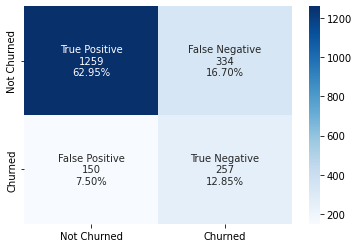

In [442]:
#Calculating the confusion matrix 
from sklearn.metrics import confusion_matrix
cm9=confusion_matrix(y_test, y_pred_e9)
labels = ['True Positive','False Negative','False Positive','True Negative']
categories = [ 'Not Churned','Churned']
make_confusion_matrix(cm9, 
                      group_names=labels,
                      categories=categories, 
                      cmap='Blues')

In [443]:
#Accuracy as per the classification report 
from sklearn import metrics
cr6=metrics.classification_report(y_test,y_pred_e9)
print(cr6)

              precision    recall  f1-score   support

           0       0.89      0.79      0.84      1593
           1       0.43      0.63      0.52       407

    accuracy                           0.76      2000
   macro avg       0.66      0.71      0.68      2000
weighted avg       0.80      0.76      0.77      2000



Overall the results are no better than the Keras Tuner alone model. From the loss curves of train and validation, the model seems to have overfit.

Let's use Grid Search CV and see if we can increase the model's performance on the metrics.

In [444]:
backend.clear_session()
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)

In [445]:
def create_model_v7(lr,batch_size):  
    np.random.seed(1337)
    model = Sequential()
    model.add(Dense(256,activation='relu',input_dim = X_train.shape[1]))
    model.add(Dropout(0.3))
    #model.add(Dense(128,activation='relu',kernel_initializer='he_uniform'))
    model.add(Dense(128,activation='relu'))
    model.add(Dropout(0.3))
    model.add(Dense(64,activation='relu'))
    model.add(Dropout(0.2))
    #model.add(Dense(32,activation='relu',kernel_initializer='he_uniform'))
    #model.add(Dropout(0.3))
    model.add(Dense(32,activation='relu')) 
    model.add(Dense(1, activation='sigmoid'))

    #compile model
    optimizer = tf.keras.optimizers.Adam(learning_rate=lr)
    model.compile(optimizer = optimizer,loss = 'binary_crossentropy', metrics = ['accuracy'])
    return model

In [446]:
keras_estimator = KerasClassifier(build_fn=create_model_v7, verbose=1)

In [447]:
# define the grid search parameters
param_grid = {
    'batch_size':[32, 64, 128],
    "lr":[0.001,0.01,0.1],}

kfold_splits = 3
grid = GridSearchCV(estimator=keras_estimator,  
                    verbose=1,
                    cv=kfold_splits,  
                    param_grid=param_grid,n_jobs=-1)
grid_result = grid.fit(X_train_normalized_df, y_train,validation_split=0.2,verbose=1) 

Fitting 3 folds for each of 9 candidates, totalling 27 fits
200/200 [==============================] - 2s 6ms/step - loss: 0.4892 - accuracy: 0.7927 - val_loss: 0.4582 - val_accuracy: 0.8000


In [448]:
# Summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']

Best: 0.796250 using {'batch_size': 32, 'lr': 0.001}


In [449]:
estimator_v7=create_model_v7(batch_size=grid_result.best_params_['batch_size'],lr=grid_result.best_params_['lr'])

estimator_v7.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 256)               2816      
                                                                 
 dropout_3 (Dropout)         (None, 256)               0         
                                                                 
 dense_6 (Dense)             (None, 128)               32896     
                                                                 
 dropout_4 (Dropout)         (None, 128)               0         
                                                                 
 dense_7 (Dense)             (None, 64)                8256      
                                                                 
 dropout_5 (Dropout)         (None, 64)                0         
                                                                 
 dense_8 (Dense)             (None, 32)               

In [450]:
optimizer = tf.keras.optimizers.Adam(grid_result.best_params_['lr'])
estimator_v7.compile(loss='binary_crossentropy',optimizer=optimizer,metrics=['accuracy'])
history_7=estimator_v7.fit(X_sm, y_sm, epochs=50, batch_size = grid_result.best_params_['batch_size'], verbose=1,validation_split=0.2)

Epoch 1/50
319/319 [==============================] - 3s 6ms/step - loss: 0.5970 - accuracy: 0.6835 - val_loss: 0.6644 - val_accuracy: 0.5871
Epoch 2/50
319/319 [==============================] - 2s 6ms/step - loss: 0.5270 - accuracy: 0.7302 - val_loss: 0.8854 - val_accuracy: 0.3991
Epoch 3/50
319/319 [==============================] - 2s 6ms/step - loss: 0.4859 - accuracy: 0.7597 - val_loss: 0.6715 - val_accuracy: 0.5338
Epoch 4/50
319/319 [==============================] - 2s 5ms/step - loss: 0.4698 - accuracy: 0.7687 - val_loss: 0.8052 - val_accuracy: 0.4486
Epoch 5/50
319/319 [==============================] - 2s 6ms/step - loss: 0.4586 - accuracy: 0.7741 - val_loss: 0.6670 - val_accuracy: 0.5965
Epoch 6/50
319/319 [==============================] - 2s 6ms/step - loss: 0.4600 - accuracy: 0.7783 - val_loss: 0.5731 - val_accuracy: 0.7005
Epoch 7/50
319/319 [==============================] - 2s 6ms/step - loss: 0.4515 - accuracy: 0.7832 - val_loss: 0.6810 - val_accuracy: 0.5805
Epoch 

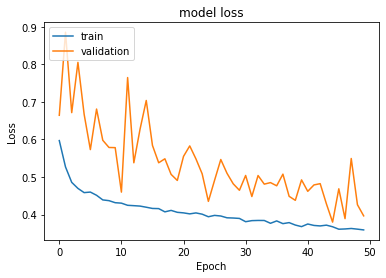

In [451]:
#Plotting Train Loss vs Validation Loss
plt.plot(history_7.history['loss'])
plt.plot(history_7.history['val_loss'])
plt.title('model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

From the above plot, we observe that there is a lot of noise in the model.

Grid Search CV also does not seem to work that well on the SMOTE data.

63/63 [==============================] - 0s 2ms/step
Best Threshold=0.393835, G-Mean=0.753


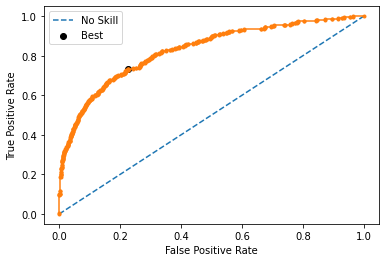

In [452]:
from sklearn.metrics import roc_curve

from matplotlib import pyplot


# predict probabilities
yhat10 = estimator_v7.predict(X_test_normalized_df)
# keep probabilities for the positive outcome only
yhat10 = yhat10[:, 0]
# calculate roc curves
fpr, tpr, thresholds10 = roc_curve(y_test, yhat10)
# calculate the g-mean for each threshold
gmeans10 = np.sqrt(tpr * (1-fpr))
# locate the index of the largest g-mean
ix = np.argmax(gmeans10)
print('Best Threshold=%f, G-Mean=%.3f' % (thresholds10[ix], gmeans10[ix]))
# plot the roc curve for the model
pyplot.plot([0,1], [0,1], linestyle='--', label='No Skill')
pyplot.plot(fpr, tpr, marker='.')
pyplot.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
# show the plot
pyplot.show()

In [453]:
y_pred_e10=estimator_v7.predict(X_test_normalized_df)
y_pred_e10 = (y_pred_e10 > thresholds10[ix])
y_pred_e10

63/63 [==============================] - 0s 2ms/step


array([[False],
       [False],
       [False],
       ...,
       [ True],
       [False],
       [False]])

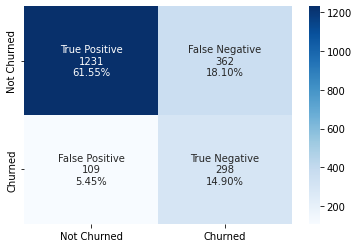

In [454]:
#Calculating the confusion matrix 
from sklearn.metrics import confusion_matrix
cm10=confusion_matrix(y_test, y_pred_e10)
labels = ['True Positive','False Negative','False Positive','True Negative']
categories = [ 'Not Churned','Churned']
make_confusion_matrix(cm10, 
                      group_names=labels,
                      categories=categories, 
                      cmap='Blues')

In [455]:
#Accuracy as per the classification report 
from sklearn import metrics
cr10=metrics.classification_report(y_test,y_pred_e10)
print(cr10)

              precision    recall  f1-score   support

           0       0.92      0.77      0.84      1593
           1       0.45      0.73      0.56       407

    accuracy                           0.76      2000
   macro avg       0.69      0.75      0.70      2000
weighted avg       0.82      0.76      0.78      2000



Oversampling using SMOTE did not help improve the recall score.

In this dataset, the SMOTE oversampling technique does not work well, as both the models we tried building have overfitted on the training dataset.

### Conclusion

Our final model here can be Model 4, which uses the Dropout regularization technique and has a good recall score of 76% with also reasonable F1 and accuracy scores. As we saw, it works well on the imbalanced dataset.

### Suggested Areas of Improvement

Build any one Machine Learning model, and use that to get the feature importance of the variables. Try to use that in the neural network model.

We can also do better feature engineerning by removing the flaws of the skewed variables if required.

### Business Recommendations

- The Bank management can deploy the final model from this exercise to identify with a reasonable degree of accuracy whether an customer is likely to churn or not, and this process seems to be easier and more time-efficient than other methods.
- From EDA, we noticed that the customers from Germany are more likey to churn compared to France and Spain. So the Bank management can take some important measures according to the geography.
- Similary we noticed that the customers with higher Age like 45 or above are more likely to churn so measures can be taken to incentivize such customers.